In [3]:
from Tester import Tester 
import robot_color_tracking as track
import numpy as np
    
trackers = {
    'ArUco' : track.ArucoTrack(img_width=600)
}

tester = Tester(trackers=trackers,id_options=['0','1','2','3'])
tester.load_positions()
tester.evaluate_error()
# tester.save_error_and_time()
# tester.load_error()
# pos_data = tester.filter_place_methods(tester.positions_data, 'night center bulb')
# err = tester.filter_place_methods(tester.error, 'night center bulb')
# tester.get_statistics_by_place() # pos_data=pos_data, err=err±±±±±±±±±±±±±±±±±±±±±±±±±±
# np.array(tester.positions_data['ArUco']['IMG_20210522_130341.jpg']['position']['0']).mean(axis=0)

Tester was initialized
Real positions loaded
ArUco: 100.00%    i: 0


In [2]:
'ArUco' in tester.methods

True

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

stat = {}
colors = tester.id_options
mm_per_px = 0.84


for p in ['daylight','night left bulb','night center bulb','night right bulb',]:
    pos_data = tester.filter_place_methods(tester.positions_data, p)
#     print(pos_data)
    err = tester.filter_place_methods(tester.error, p)
    tester.get_statistics_by_id(pos_data=pos_data, err=err) #
    stat[p] = dict(tester.statistics)
    print('--------------------------------------')
    print('Statistics('+p+'): ')
    print('--------------------------------------')
    print(tester.statistics)
#     break
# print(stat)
print()
tex = '\subsection{Detectados}\n\n'


tex+= '\\begin{table}[htb]\n'
tex+= '\centering\n'
tex+='\\begin{tabular}{|l|l|l|l|l|l|l|l|l|}\n'
tex+='\hline'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Luz solar}}                               & \multicolumn{4}{l|}{\\textbf{Lâmpada à esquerda(noite)}}               \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(stat['daylight']['ArUco'][c]['detected'],'.2f'))+ '\% '
for c in colors:
    tex+='& '+str(format(stat['night left bulb']['ArUco'][c]['detected'],'.2f'))+ '\% '
tex+=' \\\\ \hline\n'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Lâmpada ao centro(noite)}}                & \multicolumn{4}{l|}{\\textbf{Lâmpada à direita(noite)}}                \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(stat['night center bulb']['ArUco'][c]['detected'],'.2f'))+ '\% '
for c in colors:
    tex+='& '+str(format(stat['night right bulb']['ArUco'][c]['detected'],'.2f'))+ '\% '
tex+=' \\\\ \hline\n'
tex+='\end{tabular}\n'
tex+='\end{table}\n'

tex+= '\n\subsection{Falsos Positivos}\n\n'

tex+= '\\begin{table}[htb]\n'
tex+= '\centering\n'
tex+='\\begin{tabular}{|l|l|l|l|l|l|l|l|l|}\n'
tex+='\hline'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Luz solar}}                               & \multicolumn{4}{l|}{\\textbf{Lâmpada à esquerda(noite)}}               \\\\ \hline\n'
tex+='                     & \\textbf{Vermelho} & \\textbf{Verde} & \\textbf{Azul} & \\textbf{Amarelo} & \\textbf{Vermelho} & \\textbf{Verde} & \\textbf{Azul} & \\textbf{Amarelo} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(stat['daylight']['ArUco'][c]['false_positive'],'.2f'))+ '\% '
for c in colors:
    tex+='& '+str(format(stat['night left bulb']['ArUco'][c]['false_positive'],'.2f'))+ '\% '
tex+=' \\\\ \hline\n'

tex+='                     & \multicolumn{4}{l|}{\\textbf{Lâmpada ao centro(noite)}}                & \multicolumn{4}{l|}{\\textbf{Lâmpada à direita(noite)}}                \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(stat['night center bulb']['ArUco'][c]['false_positive'],'.2f'))+ '\% '
for c in colors:
    tex+='& '+str(format(stat['night right bulb']['ArUco'][c]['false_positive'],'.2f'))+ '\% '

tex+=' \\\\ \hline\n'
tex+='\end{tabular}\n'
tex+='\end{table}\n'


tex+= '\n\subsection{Erro médio de distância}\n\n'

tex+= '\\begin{table}[htb]\n'
tex+= '\centering\n'
tex+='\\begin{tabular}{|l|l|l|l|l|l|l|l|l|}\n'
tex+='\hline'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Luz solar}}                               & \multicolumn{4}{l|}{\\textbf{Lâmpada à esquerda(noite)}}               \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(mm_per_px*stat['daylight']['ArUco'][c]['distance_mean'],'.2f'))+ 'mm '
for c in colors:
    tex+='& '+str(format(mm_per_px*stat['night left bulb']['ArUco'][c]['distance_mean'],'.2f'))+ 'mm '
tex+=' \\\\ \hline\n'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Lâmpada ao centro(noite)}}                & \multicolumn{4}{l|}{\\textbf{Lâmpada à direita(noite)}}                \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(mm_per_px*stat['night center bulb']['ArUco'][c]['distance_mean'],'.2f'))+ 'mm '
for c in colors:
    tex+='& '+str(format(mm_per_px*stat['night right bulb']['ArUco'][c]['distance_mean'],'.2f'))+ 'mm '
tex+=' \\\\ \hline\n'
tex+='\end{tabular}\n'
tex+='\end{table}\n'

## if elimination == true
tex+= '\n\subsection{Erro médio de orientação}\n\n'

tex+= '\\begin{table}[htb]\n'
tex+= '\centering\n'
tex+='\\begin{tabular}{|l|l|l|l|l|l|l|l|l|}\n'
tex+='\hline'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Luz solar}}                               & \multicolumn{4}{l|}{\\textbf{Lâmpada à esquerda(noite)}}               \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(stat['daylight']['ArUco'][c]['angle_mean'],'.2f'))+ 'º '
for c in colors:
    tex+='& '+str(format(stat['night left bulb']['ArUco'][c]['angle_mean'],'.2f'))+ 'º '

tex+=' \\\\ \hline\n'
tex+='                     & \multicolumn{4}{l|}{\\textbf{Lâmpada ao centro(noite)}}                & \multicolumn{4}{l|}{\\textbf{Lâmpada à direita(noite)}}                \\\\ \hline\n'
tex+='                     & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3}  & \\textbf{Símbolo #0} & \\textbf{Símbolo #1} & \\textbf{Símbolo #2} & \\textbf{Símbolo #3} \\\\ \hline\n'
tex+='\\textbf{ArUco}  '
for c in colors:
    tex+='& '+str(format(stat['night center bulb']['ArUco'][c]['angle_mean'],'.2f'))+ 'º '
for c in colors:
    tex+='& '+str(format(stat['night right bulb']['ArUco'][c]['angle_mean'],'.2f'))+ 'º '
tex+=' \\\\ \hline\n'
tex+='\end{tabular}\n'
tex+='\end{table}\n'

print(tex)

Statistics calculated
--------------------------------------
Statistics(daylight): 
--------------------------------------
{'ArUco': {'time': 0.08365885230982414, '0': {'total_positions': 32, 'distance_mean': 41.63384505349728, 'angle_mean': 8.293496796190883, 'distance_deviation': 4.661752550973126, 'detected': 96.875, 'total_img': 31, 'false_negative': 0.0, 'false_positive': 0.0}, '1': {'total_positions': 32, 'distance_mean': 41.01081565544365, 'angle_mean': 2.6203686332746736, 'distance_deviation': 5.7763597076604185, 'detected': 96.875, 'total_img': 31, 'false_negative': 0.0, 'false_positive': 0.0}, '2': {'total_positions': 32, 'distance_mean': 43.25089909561685, 'angle_mean': 8.777394524108095, 'distance_deviation': 5.656207757381781, 'detected': 93.75, 'total_img': 30, 'false_negative': 0.0, 'false_positive': 0.0}, '3': {'total_positions': 32, 'distance_mean': 41.5322822308205, 'angle_mean': 2.4108746192495047, 'distance_deviation': 5.2096577866460585, 'detected': 100.0, 'total_i

In [5]:
input()

abacate


'abacate'

/home/hercules/Documents/Robot-Tracking-System/src/robot_color_tracking.py:669: RuntimeWarning: divide by zero encountered in float_scalars
  angle = np.arctan(sub[1]/sub[0])*360/(2*np.pi)


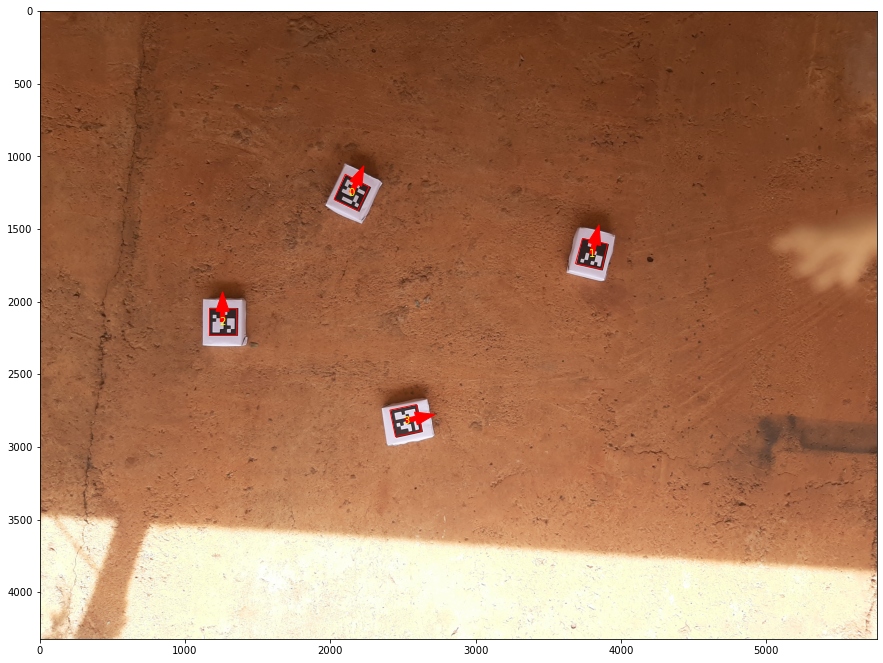

In [4]:
import cv2
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = 'IMG_20210522_131604'

trackers['ArUco'].track('../img/ArUco/'+img+'.jpg')
trackers['ArUco'].printRobotLocation()

plt.show()

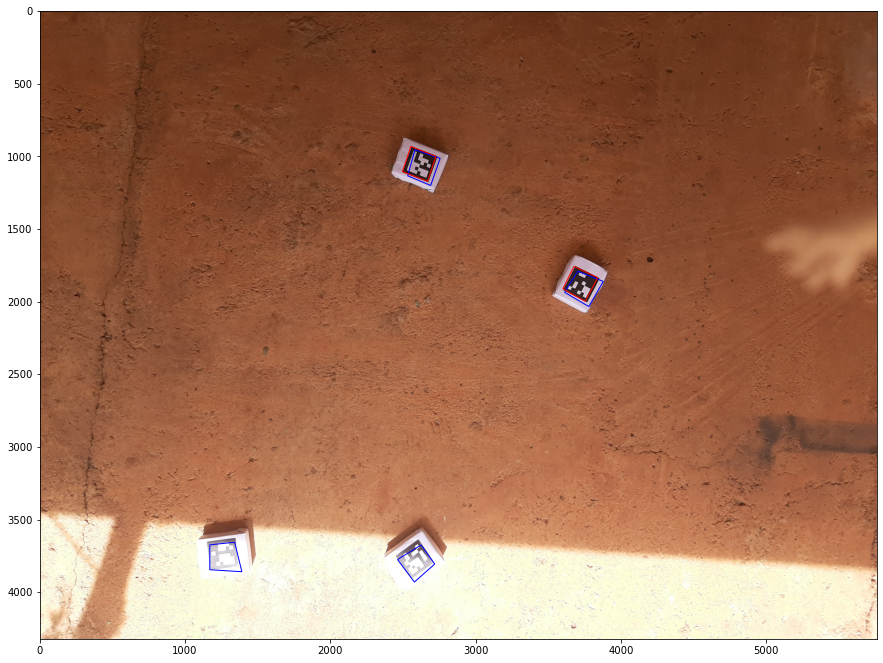

In [6]:
import cv2
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## tester.error
fig, ax = plt.subplots(figsize=(15,15))

# Display the image
img = 'IMG_20210522_131650'

trackers['ArUco'].track('../img/ArUco/'+img+'.jpg')
im = cv2.imread('../img/ArUco/'+img+'.jpg')
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
markerCorners = tester.positions_data['ArUco'][img+'.jpg']['position']
# print(markerCorners)
# print(trackers['ArUco'].markerCorners)
# print(trackers['ArUco'].getPoses())
# print(trackers['ArUco'].angle)
# trackers['ArUco'].printRobotLocation()
# print()
ids = trackers['ArUco'].getRobotIDs()
for idx, i in enumerate(markerCorners):
#     print(markerCorners[i])
    # Create a Rectangle patch
    rect = patches.Polygon(markerCorners[i],closed=True, linewidth=1, edgecolor='b', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

for i in trackers['ArUco'].markerCorners:
    # Create a Rectangle patch
    #print(idx)
    rect = patches.Polygon(i[0],closed=True, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

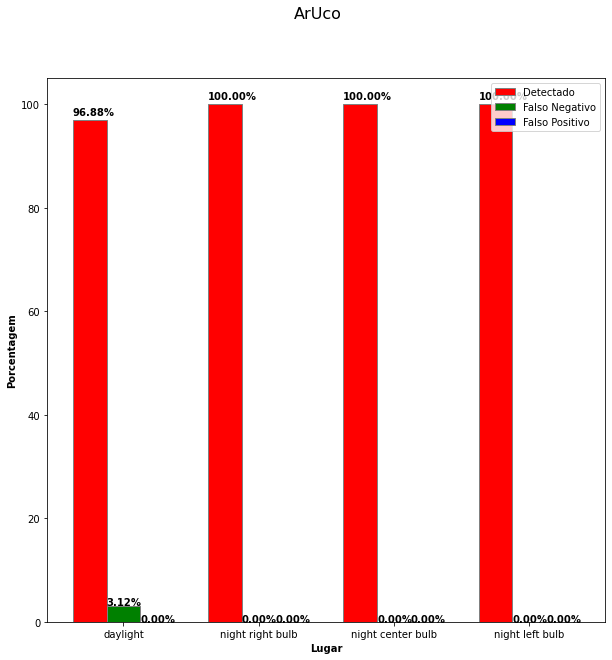

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

statistics = tester.statistics
controlled_variable = ["daylight", "night right bulb", "night center bulb", "night left bulb"] # tester.id_options #
methods = statistics
timeOfTrack = tester.timeOfTrack
# Gráfico com índices de detecção

for m in statistics:
    plt.figure(figsize=(10,10))
    axes = []
    axes.append(plt.bar(range(1, 4*len(controlled_variable), 4), [statistics[m][p]['detected'] for p in controlled_variable], color ='r', width =1, 
            edgecolor ='grey', label ='Detectado') )
    axes.append( plt.bar(range(2, 4*len(controlled_variable), 4), [statistics[m][p]['false_negative'] for p in controlled_variable], color ='g', width = 1, 
            edgecolor ='grey', label ='Falso Negativo') )
    axes.append( plt.bar(range(3, 4*len(controlled_variable), 4), [statistics[m][p]['false_positive'] for p in controlled_variable], color ='b', width = 1, 
            edgecolor ='grey', label ='Falso Positivo') )
    
    # Add annotation to bars
    for ax in axes:
        for i in ax.patches: 
            plt.text(i.xy[0], i.get_height()*1.01,  
                     str(format(i.get_height(), '.2f'))+'%', 
                     fontsize = 10, fontweight ='bold', 
                     color ='black') 
    # Adding Xticks
    plt.xlabel('Lugar', fontweight ='bold') 
    plt.ylabel('Porcentagem', fontweight ='bold') 
    plt.xticks(list(range(2, 4*len(controlled_variable), 4)),
               controlled_variable) 
    plt.suptitle(m, fontsize=16)
    plt.legend()
    plt.savefig('../algorithm_performance_data/graphs/ArUco_detections.png')
    plt.show()

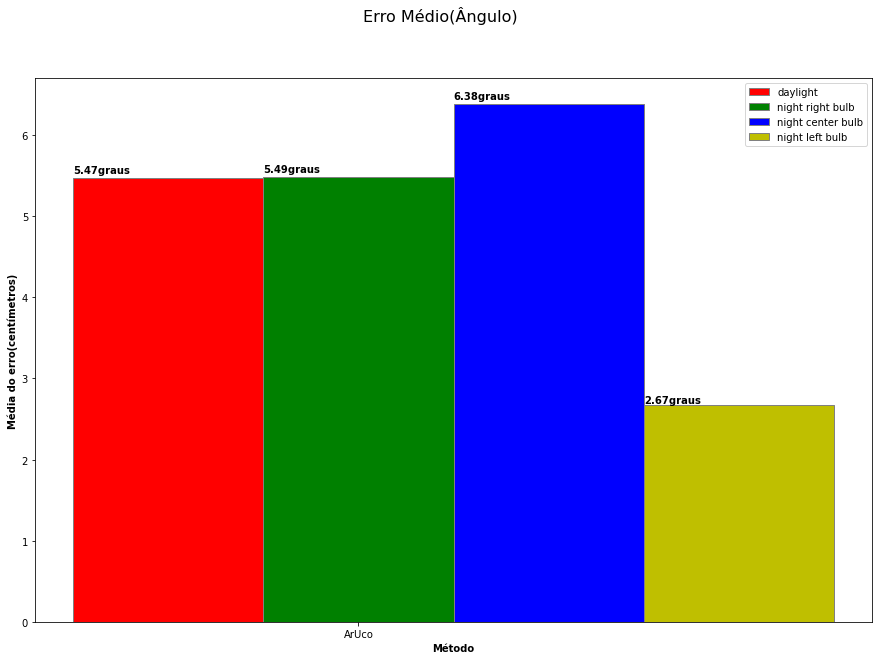

In [4]:
# Gráfico com o erro médio do ângulo esperado 

statistics = tester.statistics
color = ['r', 'g', 'b', 'y']
label = controlled_variable
mm_per_px = 0.84
plt.figure(figsize=(15,10))
for i in range(len(label)):
    ax = plt.bar(range(i+1,5*len(methods),5),[ statistics[m][label[i]]['angle_mean'] for m in methods],
                             color =color[i], width =1, edgecolor ='grey', label =label[i])
    for i in ax.patches: 
        plt.text(i.xy[0], i.get_height()*1.01,  
                 str(format(i.get_height(), '.2f'))+'graus', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Média do erro(centímetros)', fontweight ='bold') 
plt.xticks([2+5*i for i in range(len(methods))], methods) 
plt.suptitle('Erro Médio(Ângulo)', fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/ArUco_angle.png')
plt.show()

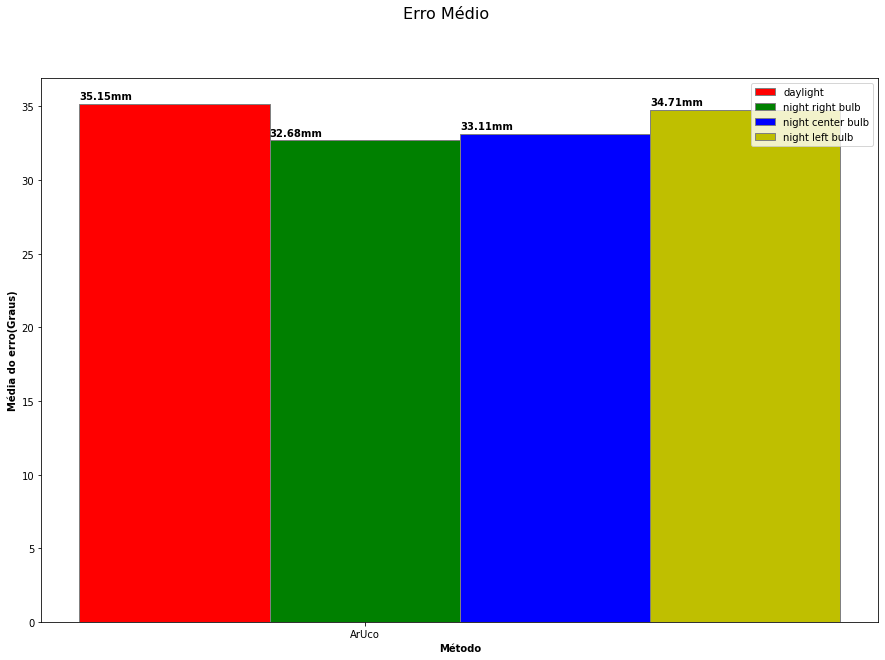

In [14]:
# Gráfico com erro médio da posição esperado

statistics = tester.statistics
color = ['r', 'g', 'b', 'y']
label = controlled_variable
plt.figure(figsize=(15,10))
for i in range(len(label)):
    ax = plt.bar(range(i+1,5*len(methods),5),[ mm_per_px*statistics[m][label[i]]['distance_mean'] for m in methods],
                             color =color[i], width =1, edgecolor ='grey', label =label[i])
    for i in ax.patches: 
        plt.text(i.xy[0], i.get_height()*1.01,  
                 str(format(i.get_height(), '.2f'))+'mm', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Média do erro(Graus)', fontweight ='bold') 
plt.xticks([2+5*i for i in range(len(methods))], methods) 
plt.suptitle('Erro Médio', fontsize=16)
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/ArUco_mean.png')
plt.show()

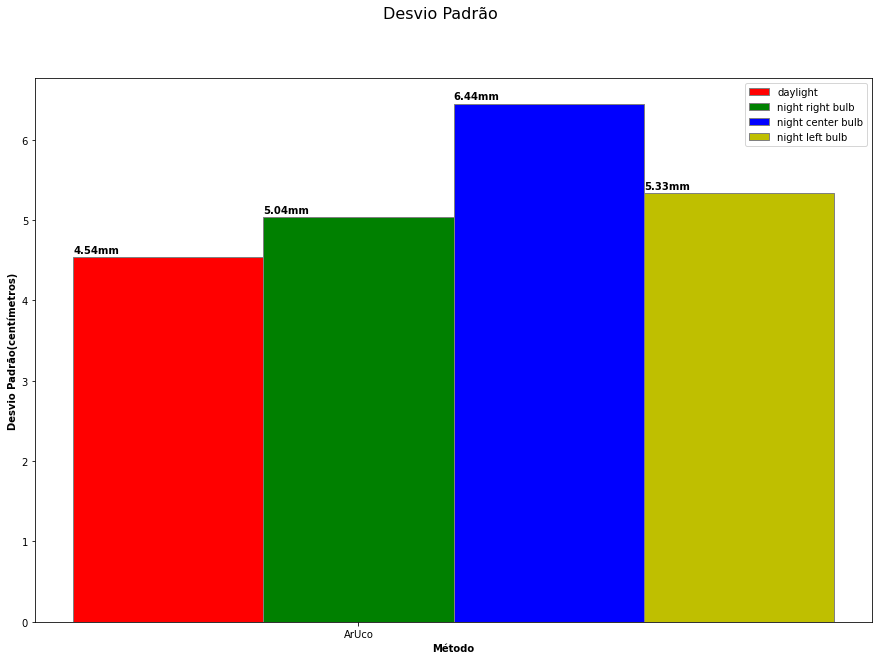

In [15]:
# Gráfico com desvio padrão da média

color = ['r', 'g', 'b', 'y']
label = controlled_variable

plt.figure(figsize=(15,10))
for i in range(len(label)):
    ax = plt.bar(range(i+1,5*len(methods),5),[ mm_per_px*statistics[m][label[i]]['distance_deviation'] for m in methods],
                             color =color[i], width =1, edgecolor ='grey', label =label[i])
    for i in ax.patches: 
        plt.text(i.xy[0], i.get_height()*1.01,  
                 str(format(i.get_height(), '.2f'))+'mm', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Desvio Padrão(centímetros)', fontweight ='bold') 
plt.xticks([2+5*i for i in range(len(methods))], methods) 
plt.suptitle('Desvio Padrão', fontsize=16)
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/ArUco_std.png')
plt.show()

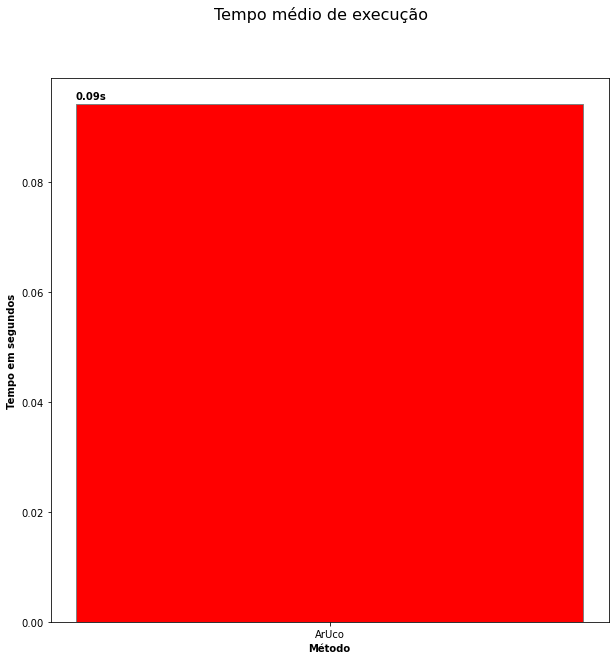

In [16]:
import matplotlib.pyplot as plt

# Tempo médio de execução
i=0
color = ['r', 'g', 'b', 'y', 'purple']
plt.figure(figsize=(10,10))
#methods = [ 'shapes_one_color','shapes','shapes_colors', 'colors_naive', 'colors']
#methods = ['colors_naive', 'hough_colors', 'achromatic']

for m in methods:
    ax = plt.bar(3*i,np.array(timeOfTrack[m]).mean(), color =color[i], width =1, edgecolor ='grey', label =m)
    for cont in ax.patches: 
        plt.text(cont.xy[0], cont.get_height()*1.01,  
                 str(format(cont.get_height(), '.2f'))+'s', 
                 fontsize = 10, fontweight ='bold', 
                 color ='black') 
    i+=1

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Tempo em segundos', fontweight ='bold') 
plt.xticks(range(0,len(methods)*3, 3), 
           methods) 
plt.suptitle('Tempo médio de execução', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/ArUco_time.png')
plt.show()